# SynMax Twitter Contest

Submission by Pranav Avva (@pranavavva)

## Data Import

In [71]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()
plt.style.use("ggplot")

In [2]:
df_tracking = pd.read_csv("tracking.csv")
df_ports = pd.read_csv("ports.csv")

In [3]:
df_tracking.head()

,vessel,datetime,lat,long,heading,speed,draft
0,1,2019-04-21 12:49:27,-69.844458,13.256915,268.0,0.1,7.800
1,2,2019-05-27 07:15:20,-56.516713,-67.264773,118.0,16.1,9.500
2,2,2019-05-15 04:18:53,-56.507373,-66.961833,246.0,13.2,11.199
3,3,2019-09-09 02:43:29,-56.438527,-67.176253,258.0,17.8,11.400
4,2,2019-05-27 08:50:12,-56.383307,-66.600653,66.0,10.8,9.500


In [4]:
df_ports.head()

,port,lat,long
0,6,42.387051,-71.057504
1,7,22.812330,120.193849
2,10,10.200166,-61.701978
3,11,36.400000,126.483333
4,13,29.897303,122.089303


## Transform Datetime

In [41]:
df_tracking["datetime"] = pd.to_datetime(df_tracking["datetime"])
for segment in "day month year hour minute second".split():
    df_tracking[segment] = df_tracking["datetime"].apply(lambda date: getattr(date, segment))
df_tracking.drop("datetime", inplace=True, axis=1)

In [45]:
df_tracking.head()

,vessel,lat,long,heading,speed,draft,day,month,year,hour,minute,second
0,1,-69.844458,13.256915,268.0,0.1,7.800,21,4,2019,12,49,27
1,2,-56.516713,-67.264773,118.0,16.1,9.500,27,5,2019,7,15,20
2,2,-56.507373,-66.961833,246.0,13.2,11.199,15,5,2019,4,18,53
3,3,-56.438527,-67.176253,258.0,17.8,11.400,9,9,2019,2,43,29
4,2,-56.383307,-66.600653,66.0,10.8,9.500,27,5,2019,8,50,12


## Exploratory Data Analysis

### Scatterplot Maps

<AxesSubplot:xlabel='long', ylabel='lat'>

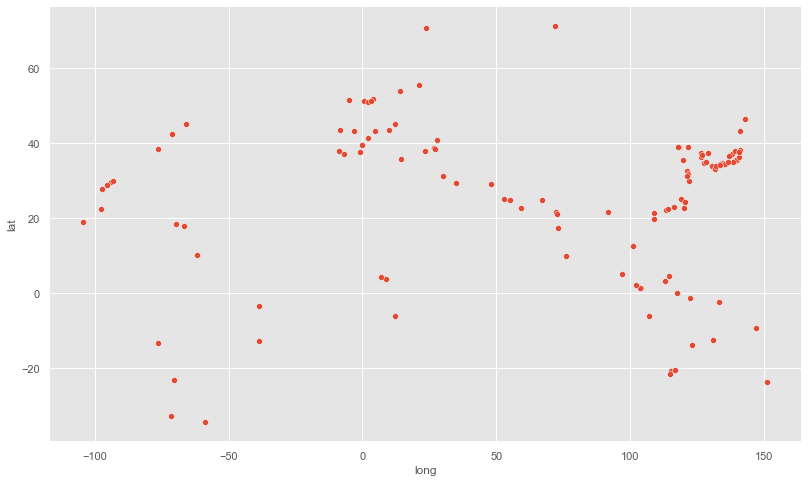

In [72]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_ports, x="long", y="lat")

<AxesSubplot:xlabel='long', ylabel='lat'>

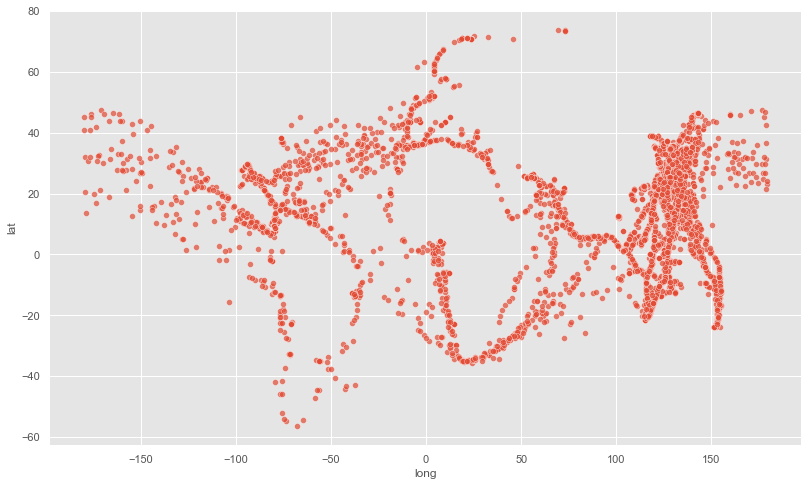

In [73]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_tracking.sample(5000), x="long", y="lat", alpha=0.7)

### Other plots

<Figure size 864x576 with 0 Axes>

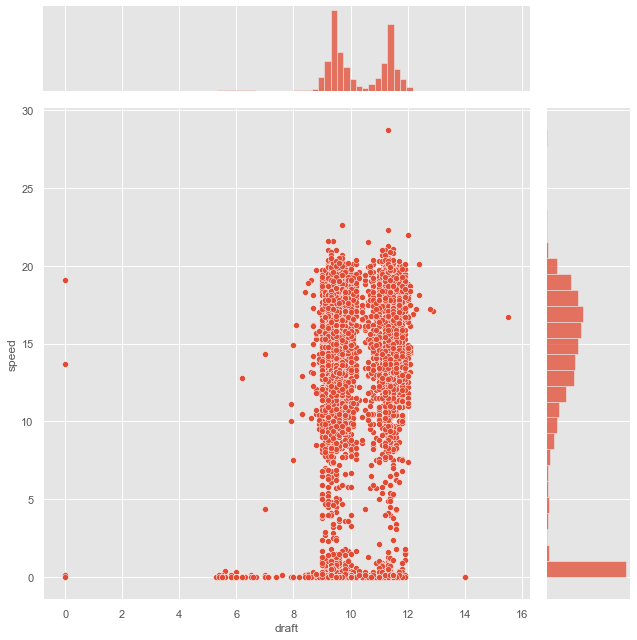

In [74]:
plt.figure(figsize=(12,8))
sns.jointplot(data=df_tracking.sample(5000), x="draft", y="speed", kind="scatter", height=9)

<AxesSubplot:xlabel='month', ylabel='speed'>

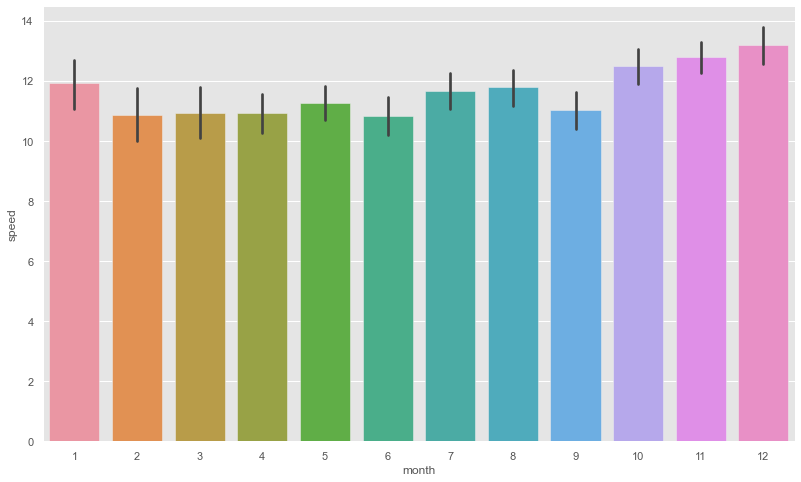

In [76]:
plt.figure(figsize=(12,8))
sns.barplot(data=df_tracking.sample(5000), x="month", y="speed")